# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [124]:
#https://www.theforage.com/virtual-experience/NjynCWzGSaWXQCxSX/british-airways/data-science-yqoz/web-scraping-to-gain-company-insights
#https://www.dataschool.io/python-web-scraping-of-president-trumps-lies/
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [125]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [126]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Manchester to Copenhagen vi...
1,✅ Trip Verified | I have never seen such disr...
2,✅ Trip Verified | Paid for a 14 hour long fli...
3,✅ Trip Verified | Very inconsiderate PA annou...
4,"✅ Trip Verified | Absolutely terrible, lost m..."


In [127]:
df.to_csv("BA_reviews.csv")
df.head()

,reviews
0,✅ Trip Verified | Manchester to Copenhagen vi...
1,✅ Trip Verified | I have never seen such disr...
2,✅ Trip Verified | Paid for a 14 hour long fli...
3,✅ Trip Verified | Very inconsiderate PA annou...
4,"✅ Trip Verified | Absolutely terrible, lost m..."


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [128]:
#eda
df.isnull().sum()

reviews    0
dtype: int64

In [129]:
df.shape

(1000, 1)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [131]:
df[['status', 'review']] = df['reviews'].str.split("|", expand = True)
#splitting column

In [132]:
df.head()

,reviews,status,review
0,✅ Trip Verified | Manchester to Copenhagen vi...,✅ Trip Verified,Manchester to Copenhagen via London on 30th ...
1,✅ Trip Verified | I have never seen such disr...,✅ Trip Verified,I have never seen such disrespect to a custo...
2,✅ Trip Verified | Paid for a 14 hour long fli...,✅ Trip Verified,Paid for a 14 hour long flight ticket which ...
3,✅ Trip Verified | Very inconsiderate PA annou...,✅ Trip Verified,Very inconsiderate PA announcements were mad...
4,"✅ Trip Verified | Absolutely terrible, lost m...",✅ Trip Verified,"Absolutely terrible, lost my luggage on both..."


In [133]:
#counting nr. of stopwords per review
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['nr_stopwords'] = df['review'].apply(lambda x: len(set(x.split()) & stop_words))


In [134]:
df['nr_stopwords'].describe()#assessing nr. of stopwords in dataset

count    1000.000000
mean       27.245000
std        12.288775
min         3.000000
25%        18.000000
50%        26.000000
75%        35.000000
max        70.000000
Name: nr_stopwords, dtype: float64

In [135]:
df.head()

,reviews,status,review,nr_stopwords
0,✅ Trip Verified | Manchester to Copenhagen vi...,✅ Trip Verified,Manchester to Copenhagen via London on 30th ...,29
1,✅ Trip Verified | I have never seen such disr...,✅ Trip Verified,I have never seen such disrespect to a custo...,22
2,✅ Trip Verified | Paid for a 14 hour long fli...,✅ Trip Verified,Paid for a 14 hour long flight ticket which ...,44
3,✅ Trip Verified | Very inconsiderate PA annou...,✅ Trip Verified,Very inconsiderate PA announcements were mad...,54
4,"✅ Trip Verified | Absolutely terrible, lost m...",✅ Trip Verified,"Absolutely terrible, lost my luggage on both...",10


In [137]:
df['review_clean'] = df['review']
#creating copy of review column
df['review_clean'] = df['review_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
#removing stopwords

In [138]:
df['review_clean'].head()

0    Manchester Copenhagen via London 30th April 20...
1    I never seen disrespect customer. It 3rd time ...
2    Paid 14 hour long flight ticket includes use i...
3    Very inconsiderate PA announcements made purse...
4    Absolutely terrible, lost luggage flights, del...
Name: review_clean, dtype: object

In [139]:
# Groupby by verified results
status = df.groupby("status")

# Summary statistic of all countries
status.describe().head()
#most trips are verified

nr_stopwords                                                  \
                        count       mean        std   min    25%   50%    75%   
status                                                                          
Not Verified            237.0  27.603376  12.590809   5.0  17.00  26.0  35.00   
cNot Verified             1.0  45.000000        NaN  45.0  45.00  45.0  45.00   
✅ Trip Verified         760.0  27.103947  12.203738   3.0  18.00  26.0  35.00   
❎ Not Verified            2.0  29.500000   6.363961  25.0  27.25  29.5  31.75   

                        
                   max  
status                  
Not Verified      69.0  
cNot Verified     45.0  
✅ Trip Verified   70.0  
❎ Not Verified    34.0

In [41]:
#creating wordclouds
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

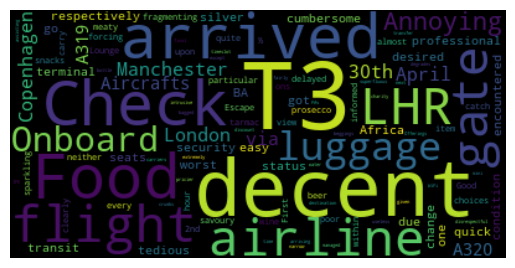

In [140]:
# Start with one review:
text = df.review_clean[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

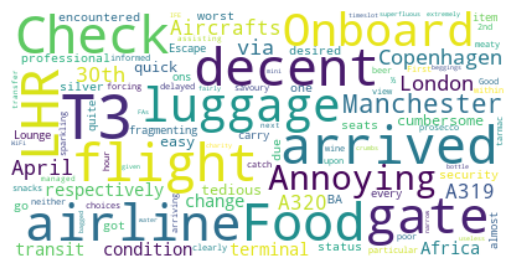

In [141]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [142]:
#combining all reviews into 1 text to see most common characteristics
text = " ".join(review for review in df.review_clean)
print ("There are {} words in the combination of all reviews.".format(len(text)))

There are 584614 words in the combination of all reviews.


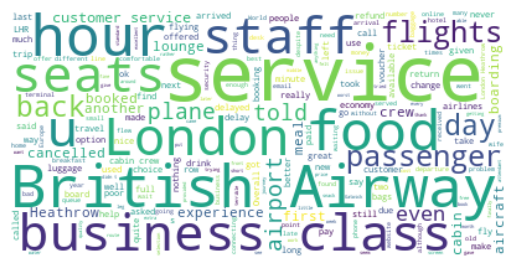

In [144]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["airline", "flight", "HND", "gate", "good", "bag","check", "club","seat", "one", "time", "BA", "British Airway"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#service, food, staff, seats, customer service are most mentioned characteristics

In [45]:
#https://www.datacamp.com/tutorial/wordcloud-python

In [151]:
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords

In [148]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\quain\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<Figure size 1000x1000 with 0 Axes>

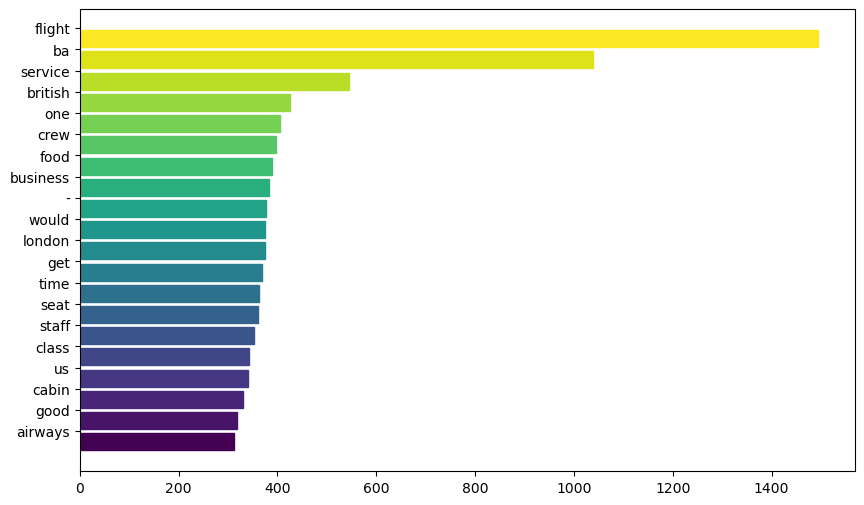

In [156]:
plt.figure(figsize=(10,10))
wordBarGraphFunction(df)

In [96]:
df.head()

,reviews,status,review,nr_stopwords,review_clean
0,✅ Trip Verified | Manchester to Copenhagen vi...,✅ Trip Verified,Manchester to Copenhagen via London on 30th ...,29,[]
1,✅ Trip Verified | I have never seen such disr...,✅ Trip Verified,I have never seen such disrespect to a custo...,22,[]
2,✅ Trip Verified | Paid for a 14 hour long fli...,✅ Trip Verified,Paid for a 14 hour long flight ticket which ...,44,[]
3,✅ Trip Verified | Very inconsiderate PA annou...,✅ Trip Verified,Very inconsiderate PA announcements were mad...,54,[]
4,"✅ Trip Verified | Absolutely terrible, lost m...",✅ Trip Verified,"Absolutely terrible, lost my luggage on both...",10,[]


In [154]:
def wordBarGraphFunction(df):
    # Tokenize the text, count the frequency of each word, and remove stopwords
    topic_words = [z.lower() for y in [x.split() for x in df['review_clean'] if isinstance(x, str)] for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key=word_count_dict.get, reverse=True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]

    # Generate a list of colors for each word
    num_words = min(20, len(popular_words_nonstop))
    colors = plt.cm.viridis(np.linspace(0, 1, num_words))

    # Plot the horizontal bar graph with color-coded words
    plt.figure(figsize=(10, 6))
    bars = plt.barh(range(num_words), [word_count_dict[w] for w in reversed(popular_words_nonstop[:num_words])])
    for bar, color in zip(bars, colors):
        bar.set_color(color)
    plt.yticks(np.arange(num_words) + 0.5, reversed(popular_words_nonstop[:num_words]))
    plt.show()

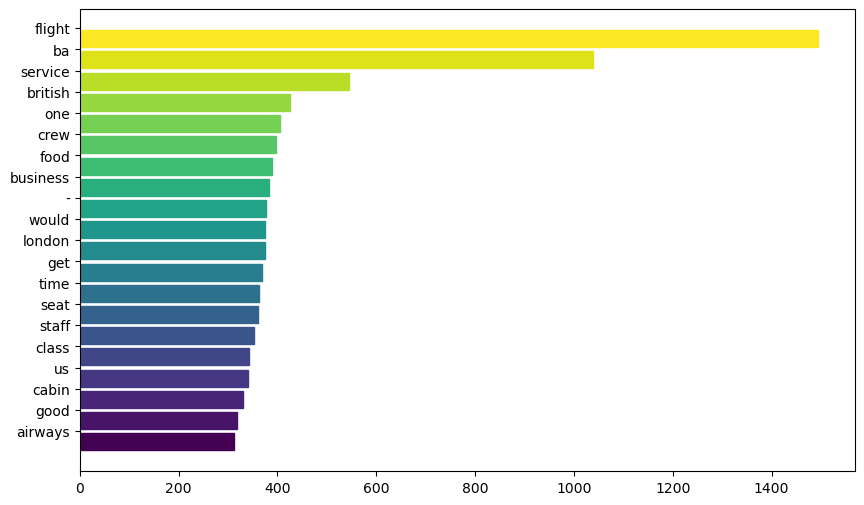

In [155]:
wordBarGraphFunction(df)

In [160]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
df['review_clean'].astype(str)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\quain\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


0      Manchester Copenhagen via London 30th April 20...
1      I never seen disrespect customer. It 3rd time ...
2      Paid 14 hour long flight ticket includes use i...
3      Very inconsiderate PA announcements made purse...
4      Absolutely terrible, lost luggage flights, del...
                             ...                        
995    Houston London. The plane left hour late engin...
996    London Delhi. The worst business class trip us...
997    Bucharest London. My flight British Airways 7 ...
998    London Heathrow Bengaluru. I found crew friend...
999    Madrid London. We paid business class paid spe...
Name: review_clean, Length: 1000, dtype: object

In [161]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent_i = SentimentIntensityAnalyzer()

def vadar_sentiment(text):
    """ Calculate and return the nltk vadar (lexicon method) sentiment """
    return sent_i.polarity_scores(text)['compound']

# create new column for vadar compound sentiment score
df['vadar compound'] = df['review_clean'].apply(vadar_sentiment)

def categorise_sentiment(sentiment, neg_threshold=-0.05, pos_threshold=0.05):
    """ categorise the sentiment value as positive (1), negative (-1) 
        or neutral (0) based on given thresholds """
    if sentiment < neg_threshold:
        label = 'negative'
    elif sentiment > pos_threshold:
        label = 'positive'
    else:
        label = 'neutral'
    return label

# new col with vadar sentiment label based on vadar compound score
df['vadar sentiment'] = df['vadar compound'].apply(categorise_sentiment)


In [162]:
df.head()

,reviews,status,review,nr_stopwords,review_clean,vadar compound,vadar sentiment
0,✅ Trip Verified | Manchester to Copenhagen vi...,✅ Trip Verified,Manchester to Copenhagen via London on 30th ...,29,Manchester Copenhagen via London 30th April 20...,0.0000,neutral
1,✅ Trip Verified | I have never seen such disr...,✅ Trip Verified,I have never seen such disrespect to a custo...,22,I never seen disrespect customer. It 3rd time ...,-0.4137,negative
2,✅ Trip Verified | Paid for a 14 hour long fli...,✅ Trip Verified,Paid for a 14 hour long flight ticket which ...,44,Paid 14 hour long flight ticket includes use i...,-0.5584,negative
3,✅ Trip Verified | Very inconsiderate PA annou...,✅ Trip Verified,Very inconsiderate PA announcements were mad...,54,Very inconsiderate PA announcements made purse...,-0.9805,negative
4,"✅ Trip Verified | Absolutely terrible, lost m...",✅ Trip Verified,"Absolutely terrible, lost my luggage on both...",10,"Absolutely terrible, lost luggage flights, del...",-0.9563,negative


C:\Users\quain\AppData\Local\Temp\ipykernel_17988\1270541006.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')
C:\Users\quain\AppData\Local\Temp\ipykernel_17988\1270541006.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label='Sentiment Score')


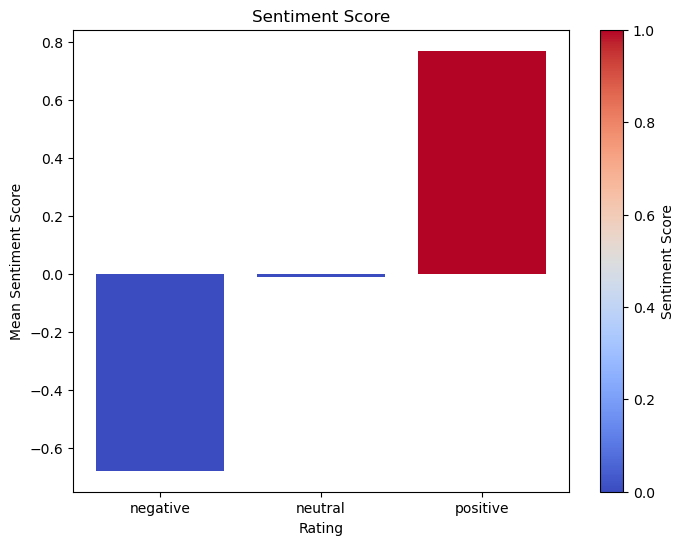

In [165]:
# Generate mean of sentiment_score by period
dfg = df.groupby('vadar sentiment')['vadar compound'].mean()

# Create a colormap
cmap = plt.cm.get_cmap('coolwarm')

# Create a bar plot with color-coded bars based on sentiment score
plt.figure(figsize=(8, 6))
bars = plt.bar(dfg.index, dfg.values, color=cmap(dfg.values / dfg.values.max()))
plt.title('Sentiment Score')
plt.xlabel('Rating')
plt.ylabel('Mean Sentiment Score')
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label='Sentiment Score')
plt.show()

C:\Users\quain\AppData\Local\Temp\ipykernel_17988\2527871180.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')
C:\Users\quain\AppData\Local\Temp\ipykernel_17988\2527871180.py:25: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label='Sentiment Score')


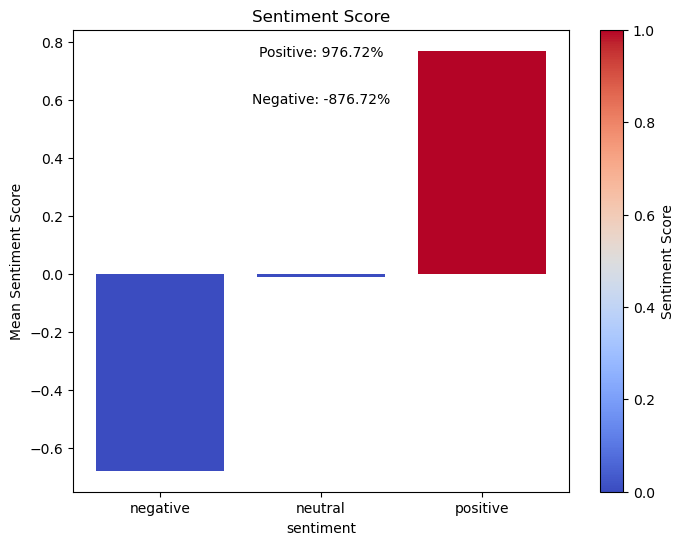

C:\Users\quain\AppData\Local\Temp\ipykernel_17988\2527871180.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')
C:\Users\quain\AppData\Local\Temp\ipykernel_17988\2527871180.py:51: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label='Sentiment Score')


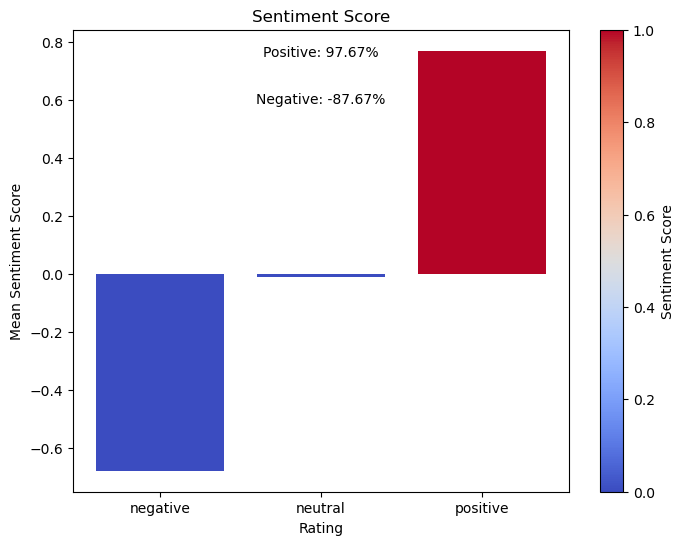

In [169]:
import matplotlib.pyplot as plt
import numpy as np

# Generate mean of sentiment_score by period
dfg = df.groupby('vadar sentiment')['vadar compound'].mean()

# Calculate percentage of positive and negative reviews
positive_percentage = (dfg[dfg > 0].sum() / dfg.sum()) * 100
negative_percentage = (dfg[dfg < 0].sum() / dfg.sum()) * 100

# Create a colormap
cmap = plt.cm.get_cmap('coolwarm')

# Create a bar plot with color-coded bars based on sentiment score
plt.figure(figsize=(8, 6))
bars = plt.bar(dfg.index, dfg.values, color=cmap(dfg.values / dfg.values.max()))

# Add labels indicating the percentage of positive and negative reviews
plt.text(0.5, 0.95, f'Positive: {positive_percentage:.2f}%', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.5, 0.85, f'Negative: {negative_percentage:.2f}%', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.title('Sentiment Score')
plt.xlabel('sentiment')
plt.ylabel('Mean Sentiment Score')
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label='Sentiment Score')
plt.show()
import matplotlib.pyplot as plt
import numpy as np

# Generate mean of sentiment_score by period
dfg = df.groupby('vadar sentiment')['vadar compound'].mean()

# Calculate percentage of positive and negative reviews
positive_percentage = (dfg[dfg > 0].sum() / dfg.sum()) * 100
negative_percentage = (dfg[dfg < 0].sum() / dfg.sum()) * 100

# Create a colormap
cmap = plt.cm.get_cmap('coolwarm')

# Create a bar plot with color-coded bars based on sentiment score
plt.figure(figsize=(8, 6))
bars = plt.bar(dfg.index, dfg.values, color=cmap(dfg.values / dfg.values.max()))

# Add labels indicating the percentage of positive and negative reviews
plt.text(0.5, 0.95, f'Positive: {positive_percentage:.2f}%', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.5, 0.85, f'Negative: {negative_percentage:.2f}%', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.title('Sentiment Score')
plt.xlabel('Rating')
plt.ylabel('Mean Sentiment Score')
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label='Sentiment Score')
plt.show()
